In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [244]:
insurance_data = pd.read_csv("../Datasets/insurance.csv")
insurance_data.head()
#insurance_data.dtypes

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [232]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [233]:
#find any null value on each column within the dataframe
insurance_data.isnull().sum().sum()
#insurance_data['age'].isnull().values.any()
#insurance_data['sex'].isnull().values.any()
#nsurance_data['bmi'].isnull().values.any()
#insurance_data['children'].isnull().values.any()
#insurance_data['smoker'].isnull().values.any()
#insurance_data['region'].isnull().values.any()
#insurance_data['charges'].isnull().values.any()

0

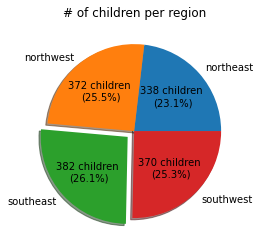

In [234]:
#find total number of children grouped by region
total_number_of_children_per_region = pd.DataFrame(insurance_data.groupby(['region'])['children'].agg(['sum']).rename(columns={'sum':'Total number of children'})).reset_index()

#making plot
labels = total_number_of_children_per_region['region'].to_list()
data = total_number_of_children_per_region['Total number of children'].to_list()
explode = (0, 0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'southeast')

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:d} children \n({:.1f}%)".format(absolute,pct)

fig1_insurance_data, ax1 = plt.subplots()
ax1.pie(no_of_children_per_region,  explode=explode, labels = labels, autopct=lambda pct: func(pct, data), shadow=True)
ax1.set_title("# of children per region")
plt.show()

Text(0, 0.5, 'Number of Children')

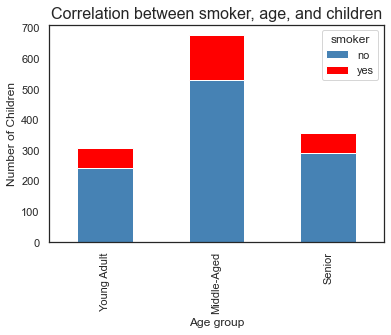

In [312]:
#find any correlation between age, smoker, and number of children

#group age by interval
insurance_data['age_intervals'] = pd.cut(x=insurance_data['age'], bins= [0, 25, 50, 90])
insurance_data['age_group'] = pd.cut(x = insurance_data['age'], bins = [0, 25, 50, 90], labels = ['Young Adult','Middle-Aged','Senior'])

#group age group with smoker columns
fig2_insurance_data = pd.DataFrame(insurance_data.groupby(['age_group','smoker']).size().reset_index(name='# of children'))
fig2_insurance_data_new = pd.DataFrame(fig2_insurance_data.pivot_table('# of children', ['age_group'],'smoker'))

#create stacked bar chart
fig2_insurance_data_new.plot(kind='bar', stacked=True, color=['steelblue', 'red'])
sns.set(style='white')
plt.title('Correlation between smoker, age, and children', fontsize=16)
plt.xlabel('Age group')
plt.ylabel('Number of Children')